# REINFORCEMENT LEARNING FOR AUTOMATED TRADING IN STOCK MARKET

##MCST1043 RESEARCH DESIGN AND ANALYSIS IN DATA SCIENCE

##Lee Hong Jian MCS241054


##Importing libraries and packages

In [ ]:
# 1. install the required packages
!pip install yfinance stable-baselines3 gym numpy pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

In [ ]:
# Step 1: Install `mamba` (conda alternative)
!pip install -q condacolab
import condacolab
condacolab.install()

# Step 2: Install `ta-lib` using mamba (conda) via a precompiled binary
!mamba install -c conda-forge ta-lib

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...

Looking for: ['ta-lib']

[+] 0.0s
[+] 0.1s
conda-forge/linux-64  ⣾  
conda-forge/noarch    ⣾  [+] 0.2s
conda-forge/linux-64   3%
conda-forge/noarch     4%[+] 0.3s
conda-forge/linux-64  12%
conda-forge/noarch    23%[+] 0.4s
conda-forge/linux-64  19%
conda-forge/noarch    35%[+] 0.5s
conda-forge/linux-64  24%
conda-forge/noarch    47%[+] 0.6s
conda-forge/linux-64  30%
conda-forge/noarch    60%[+] 0.7s
conda-forge/linux-64  37%
conda-forge/noarch    67%[+] 0.8s
conda-forge/linux-64  44%
conda-forge/noarch    83%conda-forge/noarch                                
[+] 0.9s
conda-forge/linux-64  48%[+] 1.0s
conda-forge/linux-64  59%[+] 1.1s
conda-forge/linux-64  70%[+] 1.2s
conda-forge/linux-64  77%[+] 1.3s
conda-forge/linux-64  86%[+] 1.4s
conda

In [ ]:
!pip install ta-lib

##Load the S&P 500 Data

In [ ]:
import yfinance as yf
import pandas as pd


tickers = [
    '^GSPC'
]

def get_data(tickers):
    stock_data = {}
    for ticker in tickers:
        df = yf.download(ticker, start="2016-01-01", end="2024-01-01")
        stock_data[ticker] = df
    return stock_data


stock_data = get_data(tickers)


for ticker, df in stock_data.items():
    df.to_csv(f'{ticker}.csv')

/tmp/ipython-input-1-2039806876.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start="2016-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


In [ ]:
# Check the columns to see the multi-level structure
print(f"Original columns for {ticker}: {df.columns}")

# Flatten the multi-level columns (if applicable)
df.columns = [col[0] for col in df.columns]

# Now, print the flattened columns
print(f"Flattened columns for {ticker}: {df.columns}")

Original columns for ^GSPC: MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])
Flattened columns for ^GSPC: Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [ ]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2016-01-04,2012.660034,2038.199951,1989.680054,2038.199951,4304880000
2016-01-05,2016.709961,2021.939941,2004.170044,2013.780029,3706620000
2016-01-06,1990.260010,2011.709961,1979.050049,2011.709961,4336660000
2016-01-07,1943.089966,1985.319946,1938.829956,1985.319946,5076590000
2016-01-08,1922.030029,1960.400024,1918.459961,1945.969971,4664940000


##Split the Data into Training and Test Data

In [ ]:
stock_data = {}
stock_data[ticker] = df



# Calculate the split index
train_size = int(len(df) * 0.8)  # 80% for training


# split the data into training, validation and test sets
training_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.iloc[:train_size]
    test_data[ticker] = df.iloc[train_size:]


##Add the Technical Indicators

In [ ]:
import numpy as np

def add_technical_indicators(df):
    # calculate RSI 14
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán EMA 12 và 26 kỳ cho MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Tính toán RSI 14 kỳ
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán CCI 20 kỳ
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)

    # Tính toán ADX 14 kỳ
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # drop NaN values
    df.dropna(inplace=True)

    # keep Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df

In [ ]:
# add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

/tmp/ipython-input-5-108832191.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
/tmp/ipython-input-5-108832191.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
/tmp/ipython-input-5-108832191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

##SAC & PPO

###Learning Environment for SAC & PPO

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, stock_data, transaction_cost_percent=0.0005):
        super(StockTradingEnv, self).__init__()

        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)

        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        # Initialize account balance
        self.initial_balance = 6000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}

        # Set the current step
        self.current_step = 0

        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}

    def _next_observation(self):
        # initialize the frame
        frame = np.zeros(self.obs_shape)

        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth
        frame[-1] = self.current_step # Current step

        return frame

    def step(self, actions):
        # update the current step
        self.current_step += 1

        # check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}

        current_prices = {}
        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):
            # Get the current price of the stock
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # get the action for the current ticker
            action = actions[i]

            if action > 0:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                # Calculate the cost of the shares
                cost = shares_to_buy * current_prices[ticker]
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * current_prices[ticker]
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale

        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        # Calculate the reward
        reward = self.net_worth - self.initial_balance
        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps

        obs = self._next_observation()
        return obs, reward, done, False, {}

    def render(self, mode='human'):
        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

def update_stock_data(self, new_stock_data, transaction_cost_percent=None):
    """
    Update the environment with new stock data.

    Parameters:
    new_stock_data (dict): Dictionary containing new stock data,
                           with keys as stock tickers and values as DataFrames.
    """
    # Remove empty DataFrames
    self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
    self.tickers = list(self.stock_data.keys())

    if not self.tickers:
        raise ValueError("All new stock data are empty")

    # Update the number of features if needed
    sample_df = next(iter(self.stock_data.values()))
    self.n_features = len(sample_df.columns)

    # Update observation space
    self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
    self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

    # Update maximum steps
    self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

    # Update transaction cost if provided
    if transaction_cost_percent is not None:
        self.transaction_cost_percent = transaction_cost_percent

    # Reset the environment
    self.reset()

    print(f"The environment has been updated with {len(self.tickers)} new stocks.")

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.0/763.0 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.5/585.5 kB 17.3 MB/s eta 0:00:00


###Model Tuning setting for SAC and PPO

In [ ]:
from stable_baselines3 import PPO, SAC, DQN
from stable_baselines3.common.vec_env import DummyVecEnv

class PPOAgent:
    def __init__(self, env, total_timesteps, hyperparams=None):
        if hyperparams is None:
            hyperparams = {}
        self.model = PPO("MlpPolicy", env, verbose=0, **hyperparams)
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action


class SACAgent:
    def __init__(self, env, total_timesteps, hyperparams=None):
        if hyperparams is None:
            hyperparams = {}
        self.model = SAC("MlpPolicy", env, verbose=0, **hyperparams)
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

class DQNAgent:
    def __init__(self, env, total_timesteps, hyperparams=None):
        if hyperparams is None:
            hyperparams = {}
        self.model = DQN("MlpPolicy", env, verbose=0, **hyperparams)
        self.model.learn(total_timesteps=total_timesteps)

    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action


In [ ]:
#Function to Create Environment + Train Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(training_data, total_timesteps,
                                ppo_params=None, sac_params=None):
    env = DummyVecEnv([lambda: StockTradingEnv(training_data)])
    ppo_agent = PPOAgent(env, total_timesteps, hyperparams=ppo_params)
    sac_agent = SACAgent(env, total_timesteps, hyperparams=sac_params)
    return env, ppo_agent, sac_agent


###Setting for Visualization Output

In [ ]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

In [ ]:
#Function Visualize the Agent's performance

def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Parameters:
    - env: The trading environment.
    - agent: The agent to be tested.
    - stock_data: Data for the stocks in the environment.
    - n_tests: Number of tests to run (default: 1000).
    - visualize: Boolean flag to enable or disable visualization (default: False).

    Returns:
    - A dictionary containing steps, balances, net worths, and shares held.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        obs, rewards, dones, infos = env.step(action)
        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()

    return metrics

In [ ]:
#Function to Test and Visualize the Agent's performance

def test_and_visualize_agents(env, agents, train_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, train_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")

    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

###Evaluation of the Policy for the PPO

In [ ]:
import optuna
from stable_baselines3.common.evaluation import evaluate_policy

def ppo_objective(trial):
    # Define the hyperparameter search space
    hyperparams = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'gamma': trial.suggest_float('gamma', 0.90, 0.9999),
        'n_steps': trial.suggest_int('n_steps', 64, 2048, step=64),
        'ent_coef': trial.suggest_loguniform('ent_coef', 1e-8, 1e-1),
        'clip_range': trial.suggest_float('clip_range', 0.1, 0.4),
        'gae_lambda': trial.suggest_float('gae_lambda', 0.8, 1.0),
        'max_grad_norm': trial.suggest_float('max_grad_norm', 0.3, 5.0),
    }

    # Create environment
    env = DummyVecEnv([lambda: StockTradingEnv(training_data)])

    # Train agent with current hyperparams
    agent = PPOAgent(env, total_timesteps=5000, hyperparams=hyperparams)

    # Evaluate the model
    mean_reward, _ = evaluate_policy(agent.model, env, n_eval_episodes=5, warn=False)
    return mean_reward


###Evaluation of the Policy for the SAC

In [ ]:
def sac_objective(trial):
    hyperparams = {
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
        'gamma': trial.suggest_float('gamma', 0.90, 0.9999),
        'ent_coef': trial.suggest_loguniform('ent_coef', 1e-8, 1e-1),
        'tau': trial.suggest_float('tau', 0.005, 0.02),
        'batch_size': trial.suggest_categorical('batch_size', [64, 128, 256]),
        'train_freq': trial.suggest_categorical('train_freq', [1, 4, 8]),
    }

    env = DummyVecEnv([lambda: StockTradingEnv(training_data)])
    agent = SACAgent(env, total_timesteps=5000, hyperparams=hyperparams)

    mean_reward, _ = evaluate_policy(agent.model, env, n_eval_episodes=5, warn=False)
    return mean_reward


###Output of the Hyperparameter Tuning (SAC & PPO)

In [ ]:
# PPO tuning
ppo_study = optuna.create_study(direction='maximize')
ppo_study.optimize(ppo_objective, n_trials=30)
print("Best PPO trial:", ppo_study.best_trial.params)

# SAC tuning
sac_study = optuna.create_study(direction='maximize')
sac_study.optimize(sac_objective, n_trials=30)
print("Best SAC trial:", sac_study.best_trial.params)


[I 2025-06-17 15:19:50,666] A new study created in memory with name: no-name-12b67568-16d6-444f-822e-9368f59510a1
<ipython-input-68-2649557296>:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 1e-2),
<ipython-input-68-2649557296>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'ent_coef': trial.suggest_loguniform('ent_coef', 1e-8, 1e-1),
[I 2025-06-17 15:20:08,026] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.0003422151839351582, 'gamma': 0.9523592025109567, 'n_steps': 1920, 'ent_coef': 3.6587544084688393e-06, 'clip_range': 0.1557656884492883, 'gae_lambda': 0.9968065774844567, 'ma

Best PPO trial: {'learning_rate': 0.0009266286560111579, 'gamma': 0.9145505425487951, 'n_steps': 64, 'ent_coef': 2.6758817773101076e-08, 'clip_range': 0.28792615277722045, 'gae_lambda': 0.8808687001058157, 'max_grad_norm': 2.0002618820897706}


[I 2025-06-17 15:29:07,734] Trial 0 finished with value: 0.0 and parameters: {'learning_rate': 0.0033272744296152508, 'gamma': 0.9794504264975952, 'ent_coef': 4.0341243176673705e-06, 'tau': 0.013557538204671482, 'batch_size': 256, 'train_freq': 4}. Best is trial 0 with value: 0.0.
[I 2025-06-17 15:29:39,897] Trial 1 finished with value: 5467173.684700489 and parameters: {'learning_rate': 0.0004492710356744944, 'gamma': 0.9267586634923948, 'ent_coef': 1.1767205063367186e-08, 'tau': 0.007363460452459159, 'batch_size': 256, 'train_freq': 8}. Best is trial 1 with value: 5467173.684700489.
[I 2025-06-17 15:30:07,046] Trial 2 finished with value: 0.0 and parameters: {'learning_rate': 0.001337104491118683, 'gamma': 0.9555187954623113, 'ent_coef': 1.0794772092311497e-07, 'tau': 0.011039335534340573, 'batch_size': 128, 'train_freq': 8}. Best is trial 1 with value: 5467173.684700489.
[I 2025-06-17 15:30:58,093] Trial 3 finished with value: 0.0 and parameters: {'learning_rate': 0.0004585370997161

Best SAC trial: {'learning_rate': 0.0004492710356744944, 'gamma': 0.9267586634923948, 'ent_coef': 1.1767205063367186e-08, 'tau': 0.007363460452459159, 'batch_size': 256, 'train_freq': 8}


In [ ]:
# Final training with best params
best_ppo_params = ppo_study.best_trial.params
best_sac_params = sac_study.best_trial.params

###Model Training for PPO & SAC

Testing PPO Agent...


/usr/local/lib/python3.11/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:259: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing SAC Agent...
Done testing SAC Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


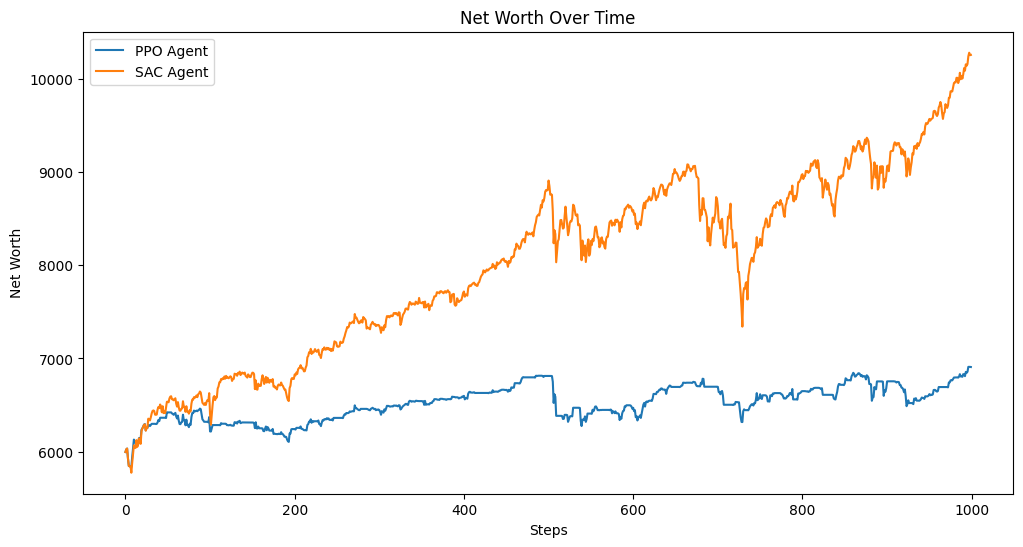

In [ ]:
# 1. Create the environment and train the agents
total_timesteps = 10000
env, ppo_agent, sac_agent = create_env_and_train_agents(training_data, total_timesteps)

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'SAC Agent': sac_agent,
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            net_worths = metrics['net_worths']
            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = (avg_return - risk_free_rate) / std_return

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

### Output of the Training for PPO and SAC

Testing PPO Agent...
Done testing PPO Agent!
Testing SAC Agent...
Done testing SAC Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


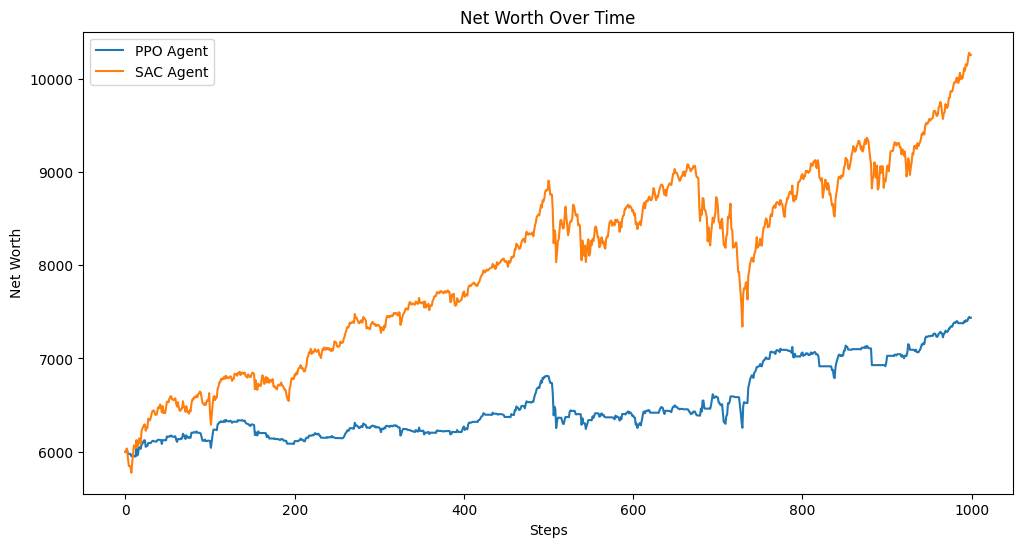

,Agent,Return,Standard Deviation,Sharpe Ratio
1,SAC Agent,0.000566,0.00757,0.074730
0,PPO Agent,0.000133,0.00388,0.034171


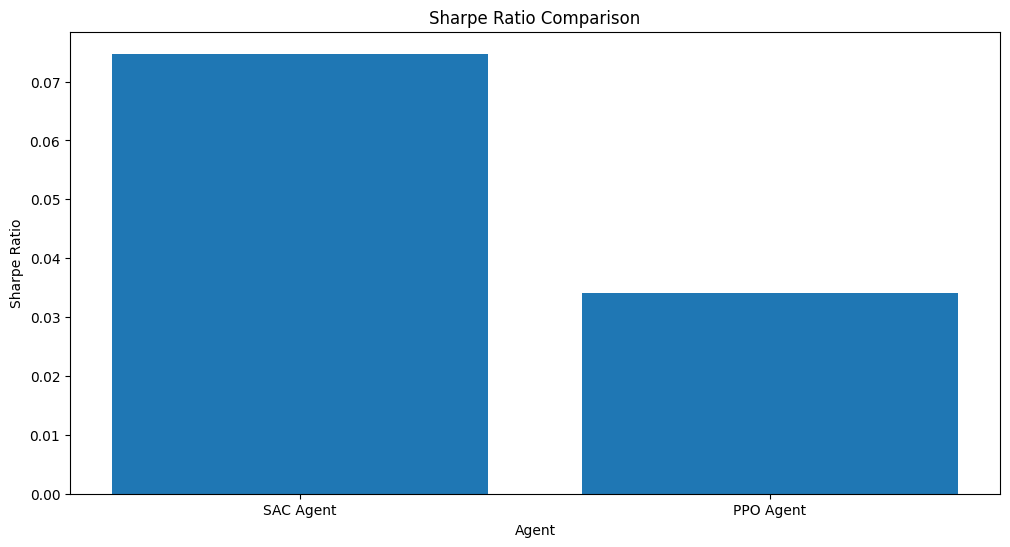

In [ ]:

# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 1000
test_agents = {
    'PPO Agent': ppo_agent,
    'SAC Agent': sac_agent,
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))

In [ ]:
ppo_agent.model.save("ppo_trading_model.zip")
sac_agent.model.save("sac_trading_model.zip")

In [ ]:
from stable_baselines3 import PPO, SAC

# Recreate the environment
env = DummyVecEnv([lambda: StockTradingEnv(training_data)])

# Load the trained model
ppo_agent.model = PPO.load("ppo_trading_model.zip", env=env)
sac_agent.model = SAC.load("sac_trading_model.zip", env=env)

##DQN

###Learning Environment for *DQN*

In [ ]:
class StockTradingEnvDiscrete(gym.Env):
    metadata = {'render_modes': ['human']}

    def __init__(self, stock_data, transaction_cost_percent=0.0005):
        super(StockTradingEnvDiscrete, self).__init__()

        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())

        if not self.tickers:
            raise ValueError("All provided stock data is empty")

        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)

        # Discrete action space: 0 = Hold, 1 = Buy, 2 = Sell per stock
        self.action_space = spaces.Discrete(3)

        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

        self.initial_balance = 6000
        self.transaction_cost_percent = transaction_cost_percent
        self.reset()

    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)
        return self._next_observation(), {}

    def _next_observation(self):
        frame = np.zeros(self.obs_shape)
        idx = 0
        for ticker in self.tickers:
            df = self.stock_data[ticker]
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            else:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            idx += self.n_features

        frame[-4-len(self.tickers)] = self.balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers]
        frame[-3] = self.net_worth
        frame[-2] = self.max_net_worth
        frame[-1] = self.current_step

        return frame

    def step(self, action):
      self.current_step += 1
      done = self.current_step > self.max_steps

      ticker = self.tickers[0]
      df = self.stock_data[ticker]
      safe_step = min(self.current_step, len(df) - 1)
      current_price = df.iloc[safe_step]['Close']

      if action == 1:  # Buy
        shares_to_buy = int(self.balance / current_price)
        cost = shares_to_buy * current_price
        transaction_cost = cost * self.transaction_cost_percent
        self.balance -= (cost + transaction_cost)
        self.shares_held[ticker] += shares_to_buy

      elif action == 2:  # Sell
        shares_to_sell = self.shares_held[ticker]
        sale = shares_to_sell * current_price
        transaction_cost = sale * self.transaction_cost_percent
        self.balance += (sale - transaction_cost)
        self.shares_held[ticker] = 0
        self.total_shares_sold[ticker] += shares_to_sell
        self.total_sales_value[ticker] += sale

      self.net_worth = self.balance + self.shares_held[ticker] * current_price
      self.max_net_worth = max(self.max_net_worth, self.net_worth)
      reward = self.net_worth - self.initial_balance
      done = done or self.net_worth <= 0
      return self._next_observation(), reward, done, False, {}


    def render(self, mode='human'):
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')


In [ ]:
def create_env_and_train_agents(training_data, total_timesteps,
                                dqn_params=None):
    env = DummyVecEnv([lambda: StockTradingEnvDiscrete(training_data)])
    dqn_agent = DQNAgent(env, total_timesteps, hyperparams=dqn_params)
    return env, dqn_agent

###Model Tuning/ Training and Evaluate for DQN

In [ ]:
import optuna
from stable_baselines3 import DQN
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.vec_env import DummyVecEnv

def dqn_objective(trial):
    # Define the hyperparameter search space for DQN
    hyperparams = {
        'learning_rate': trial.suggest_float('learning_rate', 1e-5, 1e-3, log=True),
        'gamma': trial.suggest_float('gamma', 0.90, 0.9999),
        'buffer_size': trial.suggest_int('buffer_size', 10000, 100000),
        'exploration_fraction': trial.suggest_float('exploration_fraction', 0.1, 0.5),
        'exploration_final_eps': trial.suggest_float('exploration_final_eps', 0.01, 0.1),
        'train_freq': trial.suggest_int('train_freq', 1, 32),
        'batch_size': trial.suggest_categorical('batch_size', [32, 64, 128, 256]),
        'target_update_interval': trial.suggest_int('target_update_interval', 100, 1000),
        'learning_starts': trial.suggest_int('learning_starts', 1000, 5000),
    }

    # Create environment (must use discrete actions!)
    env = DummyVecEnv([lambda: StockTradingEnvDiscrete(training_data)])

    # Train DQN agent
    model = DQN("MlpPolicy", env, verbose=0, **hyperparams)
    model.learn(total_timesteps=5000)

    # Evaluate the model
    mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=5, warn=False)
    return mean_reward

# Run Optuna study for DQN
dqn_study = optuna.create_study(direction='maximize')
dqn_study.optimize(dqn_objective, n_trials=30)

print("Best DQN trial:", dqn_study.best_trial.params)


[I 2025-06-19 07:15:03,916] A new study created in memory with name: no-name-5b5b2cd2-ff65-4ee6-b8b5-8438fcdb54e6
[I 2025-06-19 07:15:13,171] Trial 0 finished with value: 5473382.98987627 and parameters: {'learning_rate': 0.00014651931874976428, 'gamma': 0.9918846538104533, 'buffer_size': 59205, 'exploration_fraction': 0.225994315196706, 'exploration_final_eps': 0.08816268874684506, 'train_freq': 28, 'batch_size': 128, 'target_update_interval': 238, 'learning_starts': 1450}. Best is trial 0 with value: 5473382.98987627.
[I 2025-06-19 07:15:22,521] Trial 1 finished with value: 5473382.98987627 and parameters: {'learning_rate': 0.0003235177905022554, 'gamma': 0.9557760370348405, 'buffer_size': 43863, 'exploration_fraction': 0.30623494435071996, 'exploration_final_eps': 0.01832507227765013, 'train_freq': 19, 'batch_size': 256, 'target_update_interval': 492, 'learning_starts': 1368}. Best is trial 0 with value: 5473382.98987627.
[I 2025-06-19 07:15:29,675] Trial 2 finished with value: 0.0 

Best DQN trial: {'learning_rate': 0.00014651931874976428, 'gamma': 0.9918846538104533, 'buffer_size': 59205, 'exploration_fraction': 0.225994315196706, 'exploration_final_eps': 0.08816268874684506, 'train_freq': 28, 'batch_size': 128, 'target_update_interval': 238, 'learning_starts': 1450}


###Output of the Training for DQN

Testing DQN Agent...


/usr/local/lib/python3.11/dist-packages/stable_baselines3/common/vec_env/base_vec_env.py:259: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing DQN Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


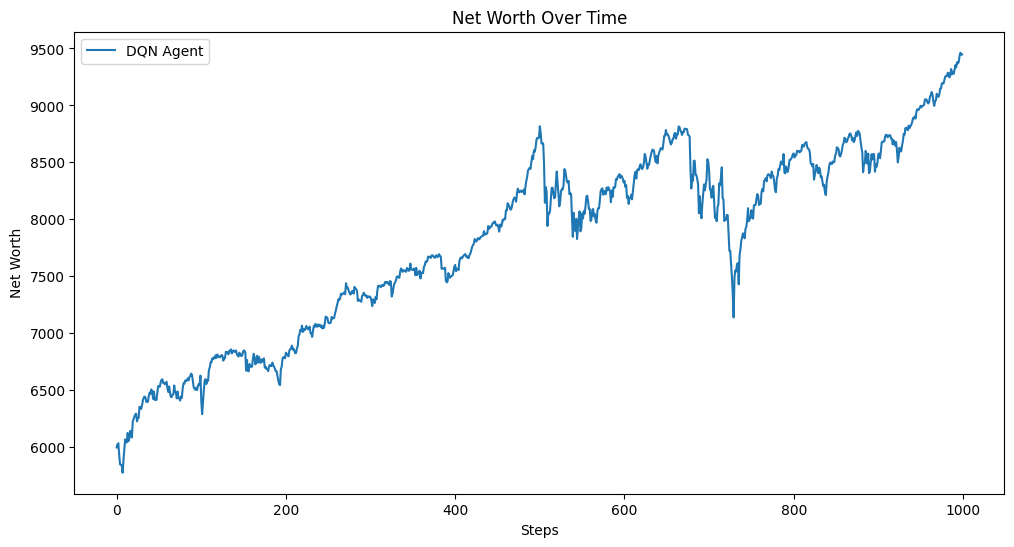

In [ ]:
# 1. Create the environment and train the agents
total_timesteps = 10000
env, dqn_agent = create_env_and_train_agents(training_data, total_timesteps)

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'DQN Agent': dqn_agent,
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)

Testing DQN Agent...
Done testing DQN Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


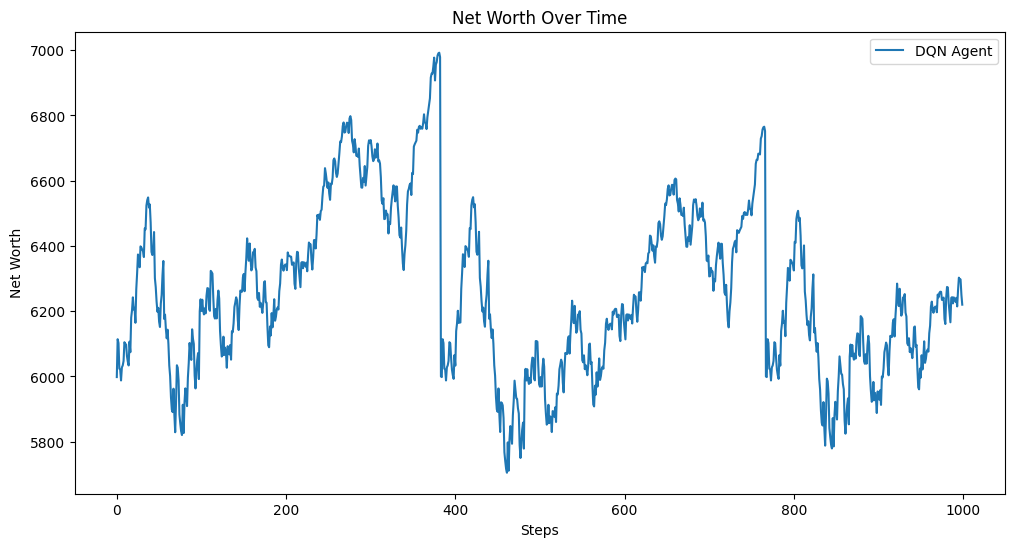

,Agent,Return,Standard Deviation,Sharpe Ratio
0,DQN Agent,0.000561,0.007621,0.073644


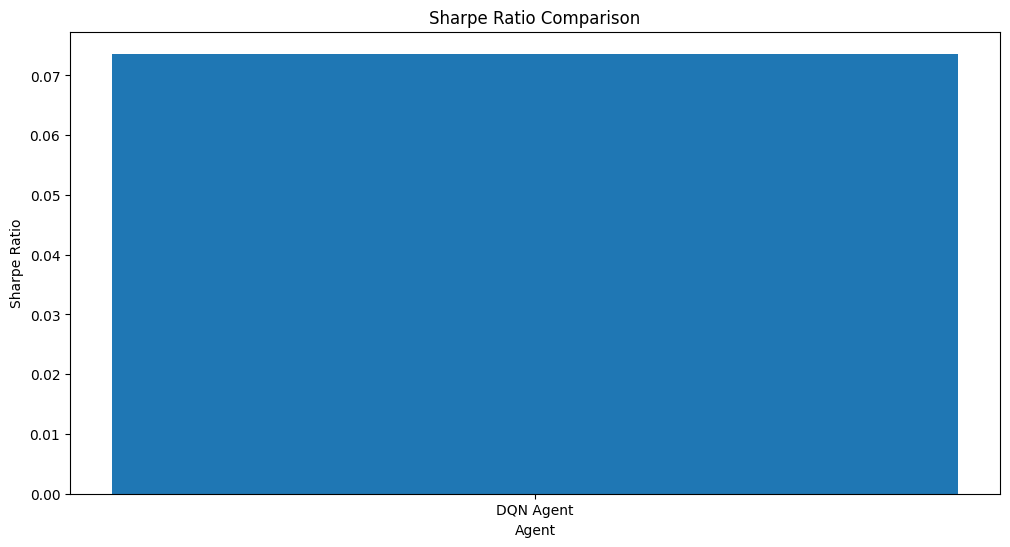

In [ ]:

# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnvDiscrete(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 1000
test_agents = {
    'DQN Agent': dqn_agent,
}
test_and_visualize_agents(test_env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))